In [ ]:
import sympy
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# High-School Maths Exercise

Getting to Know Jupyter Notebook, Python Libraries and Best Practices. Basic Workflow

## Problem 1. Markdown

In the next cell, try out some of the commands. You can just throw in some things, or do something more structured (like a small notebook).



<p style="color: #d9534f">Write some Markdown here.</p>

## Problem 2. Formulas and LaTeX

Research and recreate all formulas shown in the next cell. Try to make your cell look exactly the same as mine.

<img src="https://res.cloudinary.com/baklavabg/image/upload/v1713463019/Sofuni/Math/03.High-Shchool%20Maths/math_bmemwg.jpg" border="1" />



### Solution

Equation of a line:
$$y=ax+b$$

Roots of the quadratic equation
$ax^{2}+bx+c=0$

$$x_{1,2}=\frac{-b\pm\sqrt{b^{2}-4ac}}{2a}$$

Taylor series expansion:
$$f(x)|_{x=a} = f(a) + {f'(a)}(x-a) + \frac{f''(a)}{2!}(x-a)^2 +\dotsb+\frac{f^{(n)}(a)}{n!}(x-a)^n+\dotsb$$

Binomial theorem:
$$(x+y)^{n}=\binom{n}{0}x^{n}y^{0}+\binom{n}{1}x^{n-1}y^{1}+...+\binom{n}{n}x^{0}y^{n}= \sum_{k=0}^{n} \binom{n}{k}x^{n-k}y^{k}$$

An integral:
$$\int_{-\infty}^{+\infty} e^{-x^{2}} \,dx=\sqrt{\pi}$$

A short matrix:
$$\begin{pmatrix}
2 & 1 & 3\\
2 & 6 & 8\\
6 & 8 & 18
\end{pmatrix}$$

A long matrix:
$$A=\begin{pmatrix}
a_{11} & a_{12} & \dotsb & a_{1n}\\
a_{21} & a_{22} & \dotsb & a_{2n}\\
\dotsb & \dotsb & \ddots & \dotsb & \\
a_{m1} & a_{m2} & \dotsb & a_{mn}\\
\end{pmatrix}$$



## Problem 3. Solving equations with Python

Write a function which returns the roots of a quadratic equation.

### Solution

In [ ]:
def solve_quadratic_equation(a, b, c):
    if a == 0:
        if b == 0:
            return []
        else:
            return [-c / b]

    D = b**2 - 4*a*c

    if D < 0:
        return []
    elif D == 0:
        x = -b / (2 * a)
        return [x]
    else:
        sqrt_D = math.sqrt(D)
        x1 = (-b - sqrt_D) / (2 * a)
        x2 = (-b + sqrt_D) / (2 * a)

    return [x1, x2]

### Test quadratic equation

In [ ]:
assert solve_quadratic_equation(1, -3, -2) == [-0.5615528128088303, 3.5615528128088303]
assert solve_quadratic_equation(1, -8, 16) == [4]
assert solve_quadratic_equation(1, 5, 6) == [-3, -2]
assert solve_quadratic_equation(5, 1, 6) == []
assert solve_quadratic_equation(1, 1, 1) == []

assert solve_quadratic_equation(0, 0, 0) == []
assert solve_quadratic_equation(0, 0, 5) == []
assert solve_quadratic_equation(0, 1, 1) == [-1]

assert solve_quadratic_equation(1e6, -3e6, 2e6) == [1, 2]
assert solve_quadratic_equation(1e-6, -3e-6, 2e-6) == [0.9999999999999998, 2.0000000000000004]

## Problem 5. Equation of a Line

Plot a linear equation like e.g. $y = 2x + 3$

### Solution

In [ ]:
x = np.linspace(-3, 5, 10)
y = 2 * x + 3

plt.plot(x, y)
res = plt.xlim([-3, 5])
plt.ylim([y[0], y[-1]])

ax = plt.gca()
ax.set_ylim(0.1, 13)
ax.spines["bottom"].set_position("zero")
ax.spines["left"].set_position("zero")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

## * Problem 6. Linearizing Functions

Linearize $$ y = ae^{bx} $$

### Solution

In [ ]:
def linearize_equation(a, b, x):
    """
    Linearizes the equation y = ae^(bx) for an array of x values.

    Parameters:
    a (float): The coefficient for the exponential term.
    b (float): The exponent coefficient.
    x (array-like): The x values for which to calculate the linearized y values.

    Returns:
    array-like: The linearized y values.
    """
    Y = np.log(a) + b * x
    return Y

### Test linearizing an equation

In [ ]:
a = 2
b = 3
x = [1, 2, 3, 4, 5]
y = [linearize_equation(a, b, x_value) for x_value in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('ln(y)')
plt.title('Linearization of y = ae^(bx)')
plt.grid(True)
plt.show()

## * Problem 7. Generalizing the Plotting Function

Write a Python function which takes another function, x range and number of points, and plots the function graph by evaluating it at every point.

**BIG hint:** If you want to use not only `numpy` functions for `f` but any one function, a very useful (and easy) thing to do, is to vectorize the function `f` (e.g. to allow it to be used with `numpy` broadcasting).

### Solution

In [ ]:
def plot_math_function(f, min_x, max_x, num_points):
    x = np.linspace(min_x, max_x, num_points)
    f_vectorized = np.vectorize(f)
    y = f_vectorized(x)

    fig, ax = plt.subplots(figsize=(7, 5))

    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')
    ax.plot(x, y)

    plt.show()

### Test plotting function

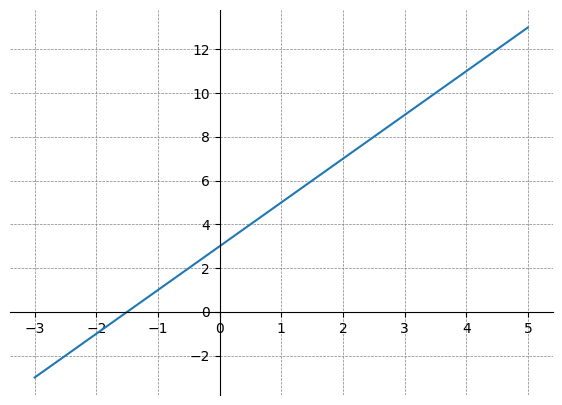

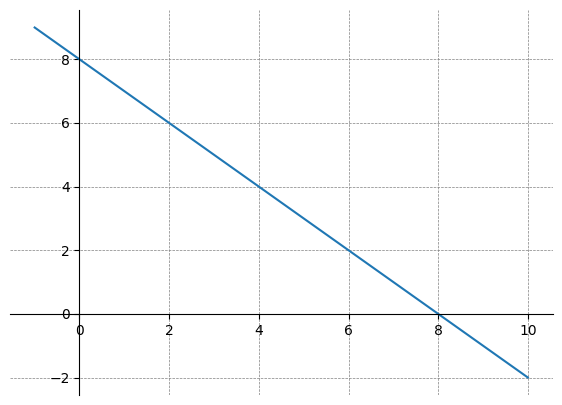

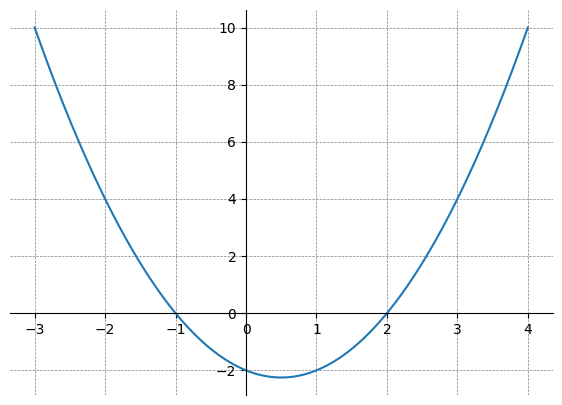

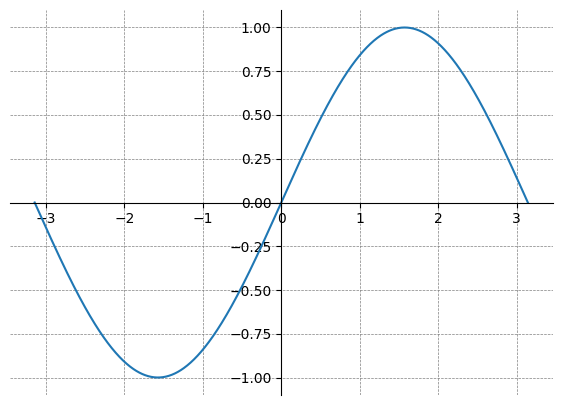

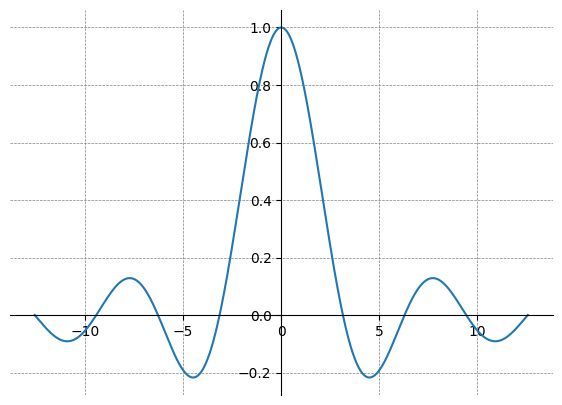

In [ ]:
plot_math_function(lambda x: 2 * x + 3, -3, 5, 1000)
plot_math_function(lambda x: -x + 8, -1, 10, 1000)
plot_math_function(lambda x: x**2 - x - 2, -3, 4, 1000)
plot_math_function(lambda x: np.sin(x), -np.pi, np.pi, 1000)
plot_math_function(lambda x: np.sin(x) / x, -4 * np.pi, 4 * np.pi, 1000)

## * Problem 8. Solving Equations Graphically

Improve the above plotting function. It should take multiple functions and plot them all on the same graph. Note that we still need to provide the $[x_{min}; x_{max}]$ range and it's going to be the same for all functions.

### Solution

In [ ]:
def plot_math_functions(functions, min_x, max_x, num_points):
    x = np.linspace(min_x, max_x, num_points)

    fig, ax = plt.subplots(figsize=(7, 5))

    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(True, linestyle='--', linewidth=0.5, color='gray')

    for f in functions:
        f_vectorized = np.vectorize(f)
        y = f_vectorized(x)
        ax.plot(x, y)

    plt.show()

### Test

In [ ]:
plot_math_functions([lambda x: 2 * x + 3, lambda x: 0], -3, 5, 1000)
plot_math_functions([lambda x: 3 * x**2 - 2 * x + 5, lambda x: 3 * x + 7], -2, 3, 1000)
plot_math_functions([lambda x: (-4 * x + 7) / 3, lambda x: (-3 * x + 8) / 5, lambda x: (-x - 1) / -2], -1, 4, 1000)

## Problem 9. Trigonometric Functions

Use the plotting function you wrote above to plot the inverse trigonometric functions. Use `numpy` (look up how to use inverse trigonometric functions).

### Solution

In [ ]:
plot_math_function(np.arcsin, -1, 1, 500)
plot_math_function(np.arccos, -1, 1, 500)
plot_math_function(np.arctan, -10, 10, 500)
plot_math_function(lambda x: np.pi / 2 - np.arctan(x), -10, 10, 1000)

plot_math_functions([lambda x: np.arcsin(x), lambda x: np.arccos(x)], -1, 1, 500)
plot_math_functions([lambda x: np.arctan(x), lambda x: math.pi / 2 - np.arctan(x)], -np.pi, np.pi, 120)

## ➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️➡️

## * Problem 10. Perlin Noise
This algorithm has many applications in computer graphics and can serve to demonstrate several things... and help us learn about math, algorithms and Python :).
#### Noise
Noise is just random values. We can generate noise by just calling a random generator. Note that these are actually called *pseudorandom generators*. We'll talk about this later in this course.
We can generate noise in however many dimensions we want. For example, if we want to generate a single dimension, we just pick N random values and call it a day. If we want to generate a 2D noise space, we can take an approach which is similar to what we already did with `np.meshgrid()`.

$$ \text{noise}(x, y) = N, N \in [n_{min}, n_{max}] $$

This function takes two coordinates and returns a single number N between $n_{min}$ and $n_{max}$. (This is what we call a "scalar field").

Random variables are always connected to **distributions**. We'll talk about these a great deal but now let's just say that these define what our noise will look like. In the most basic case, we can have "uniform noise" - that is, each point in our little noise space $[n_{min}, n_{max}]$ will have an equal chance (probability) of being selected.

#### Perlin noise
There are many more distributions but right now we'll want to have a look at a particular one. **Perlin noise** is a kind of noise which looks smooth. It looks cool, especially if it's colored. The output may be tweaked to look like clouds, fire, etc. 3D Perlin noise is most widely used to generate random terrain.

#### Algorithm
... Now you're on your own :). Research how the algorithm is implemented (note that this will require that you understand some other basic concepts like vectors and gradients).

#### Your task
1. Research about the problem. See what articles, papers, Python notebooks, demos, etc. other people have created
2. Create a new notebook and document your findings. Include any assumptions, models, formulas, etc. that you're using
3. Implement the algorithm. Try not to copy others' work, rather try to do it on your own using the model you've created
4. Test and improve the algorithm
5. (Optional) Create a cool demo :), e.g. using Perlin noise to simulate clouds. You can even do an animation (hint: you'll need gradients not only in space but also in time)
6. Communicate the results

Hint: [This](http://flafla2.github.io/2014/08/09/perlinnoise.html) is a very good resource. It can show you both how to organize your notebook (which is important) and how to implement the algorithm.